In [1]:
%matplotlib inline
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import column, Integer, String, Float
import pandas as pd

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Use the session to query Station table and display the first 5 locations
for row in session.query(Measurement, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000002962146B6A0>, 'USC00519397', '2010-01-01', 0.08, 65.0)
(<sqlalchemy.ext.automap.measurement object at 0x000002962146B760>, 'USC00519397', '2010-01-02', 0.0, 63.0)
(<sqlalchemy.ext.automap.measurement object at 0x000002962146B7F0>, 'USC00519397', '2010-01-03', 0.0, 74.0)
(<sqlalchemy.ext.automap.measurement object at 0x000002962146B850>, 'USC00519397', '2010-01-04', 0.0, 76.0)
(<sqlalchemy.ext.automap.measurement object at 0x000002962146B8B0>, 'USC00519397', '2010-01-06', None, 73.0)


In [10]:
# Use the session to query Measurement table and display the first 5 locations
for row in session.query(Station, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation ).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x0000029621488430>, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(<sqlalchemy.ext.automap.station object at 0x0000029621488520>, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(<sqlalchemy.ext.automap.station object at 0x0000029621488580>, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(<sqlalchemy.ext.automap.station object at 0x00000296214885E0>, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(<sqlalchemy.ext.automap.station object at 0x0000029621488640>, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# print(recent_date)

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
results=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >'2016-08-23',\
        Measurement.date <'2017-08-23').order_by(Measurement.date).statement
results


In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# results = session.query(Measurement.date, Measurement.prcp).statement
prcp_df = pd.read_sql_query(results, session.bind)
prcp_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2214,2017-08-21,NaN
2215,2017-08-21,0.56
2216,2017-08-22,0.00
2217,2017-08-22,0.00


In [14]:
# Get rid of NaN data
prcp2_df = prcp_df.dropna()

In [15]:
# Sort the dataframe by date
prcp2_df.sort_values("date", ascending = True)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15
...,...,...
2212,2017-08-21,0.00
2215,2017-08-21,0.56
2217,2017-08-22,0.00
2216,2017-08-22,0.00


Text(0.5, 1.0, 'Precipitation')

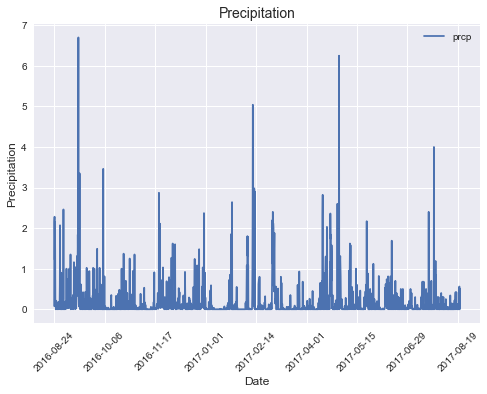

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
# from matplotlib.dates import DateFormatter
# import matplotlib.dates as mdates

prcp2_df.set_index('date').sort_index().plot(rot=45)
plt.xlabel("Date",size=12)
plt.ylabel("Precipitation",size=12)
plt.title("Precipitation", size=14)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp2_df.describe(include='all')

,date,prcp
count,2011,2011.000000
unique,364,NaN
top,2017-02-09,NaN
freq,7,NaN
mean,NaN,0.176549
std,NaN,0.460667
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.020000
75%,NaN,0.130000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).count()
print(stations)

9


In [19]:
session.query(Measurement).__dict__

{'session': <sqlalchemy.orm.session.Session at 0x29621417760>,
 '_propagate_attrs': immutabledict({'compile_state_plugin': 'orm', 'plugin_subject': <Mapper at 0x296213eb340; measurement>}),
 '_raw_columns': [Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)]}

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity = session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).\
order_by(func.count(Measurement.prcp).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [21]:
# Using the most active station, calculate the lowest, highest, and average temperature
station1 = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
# station1



In [22]:
qry = session.query (func.max(Measurement.tobs), 
                    func.min(Measurement.tobs),
                    func.avg(Measurement.tobs),
                    )
df = pd.DataFrame(qry, columns = ["High Temp", "Min Temp", "Avg Temp"])
df

,High Temp,Min Temp,Avg Temp
0,87.0,53.0,73.097954


In [23]:
# Using the most active station id. 
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results2=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >'2016-08-23', Measurement.date <'2017-08-23').\
    order_by(Measurement.date).filter(Measurement.station == 'USC00519281').statement

# results2 = session.query(Measurement.date, Measurement.tobs).statement
temp_df = pd.read_sql_query(results2, session.bind)
temp_df

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

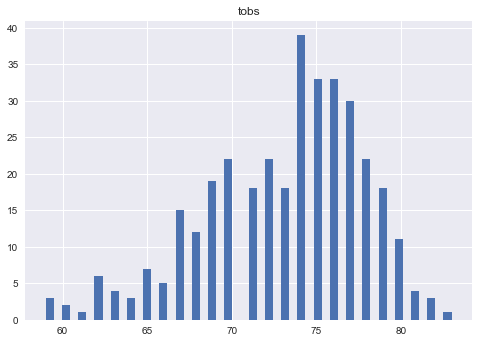

In [24]:
# Create histogram
temp_df.hist(bins = 50)

# Close session

In [25]:
# Close Session
session.close()

# STEP 2 - Climate App

### Setup

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [27]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [28]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [29]:
# Map the measurement class
Measurement = Base.classes.measurement

In [30]:
# Map the Station class
Station = Base.classes.station

In [31]:
# create a new session
session = Session(engine)

### Joins

In [32]:
# Confirm the tables to join
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [33]:
# Get a list of column names and types
# For measurement: 
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [34]:
# Get a list of column names and types
# For station:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [35]:
# Join Measurement and Station tables on station name
sel = [Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs,\
         Station.station, Station.latitude, Station.longitude, Station.elevation]
same_station = session.query(*sel).filter(Measurement.station == Station.station).limit(10).all()

In [36]:
for record in same_station:
    (Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs,\
         Station.station, Station.latitude, Station.longitude, Station.elevation) = record
#     print(
#         f"'{Measurement.station} {Measurement.date} {Measurement.prcp} {Measurement.tobs}'"
#         f"same station as '{Station.station} {Station.latitude} {Station.longitude} {Station.elevation}'.")
print(record)

('USC00519397', '2010-01-11', 0.01, 64.0, 'USC00519397', 21.2716, -157.8168, 3.0)
